# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Assign the OpenWeatherMap API key directly
api_key = 'f13af0aa06401c49f026bf2a1691c343'

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Debugging: Print the API response
        print(f"City: {city}, Response: {city_weather}")

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uthal
City: uthal, Response: {'coord': {'lon': 66.6219, 'lat': 25.8072}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 29.15, 'feels_like': 35.39, 'temp_min': 29.15, 'temp_max': 29.15, 'pressure': 995, 'humidity': 81, 'sea_level': 995, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 162, 'gust': 3}, 'clouds': {'all': 22}, 'dt': 1718929442, 'sys': {'country': 'PK', 'sunrise': 1718930566, 'sunset': 1718980070}, 'timezone': 18000, 'id': 1162862, 'name': 'Uthal', 'cod': 200}
Processing Record 2 of Set 1 | ribeira grande
City: ribeira grande, Response: {'coord': {'lon': -28.7, 'lat': 38.5167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.32, 'feels_like': 19.5, 'temp_min': 19.32, 'temp_max': 19.32, 'pressure': 102

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uthal,25.8072,66.6219,29.15,81,22,2.98,PK,1718929442
1,ribeira grande,38.5167,-28.7000,19.32,84,100,1.34,PT,1718929444
2,port-aux-francais,-49.3500,70.2167,2.32,69,41,8.43,TF,1718929445
3,puerto natales,-51.7236,-72.4875,-11.75,92,53,0.00,CL,1718929446
4,turtas,58.9417,69.1325,13.81,92,98,2.50,RU,1718929447


In [21]:
import os

# Create the output directory if it does not exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uthal,25.8072,66.6219,29.15,81,22,2.98,PK,1718929442
1,ribeira grande,38.5167,-28.7000,19.32,84,100,1.34,PT,1718929444
2,port-aux-francais,-49.3500,70.2167,2.32,69,41,8.43,TF,1718929445
3,puerto natales,-51.7236,-72.4875,-11.75,92,53,0.00,CL,1718929446
4,turtas,58.9417,69.1325,13.81,92,98,2.50,RU,1718929447


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

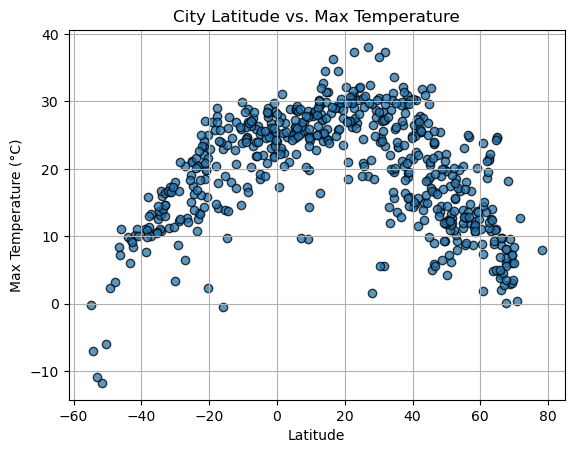

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

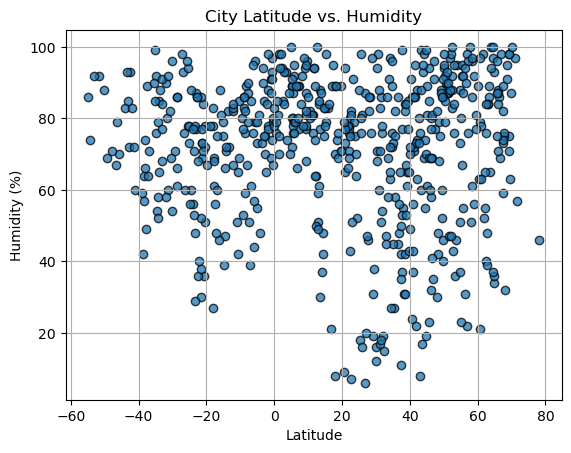

In [26]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

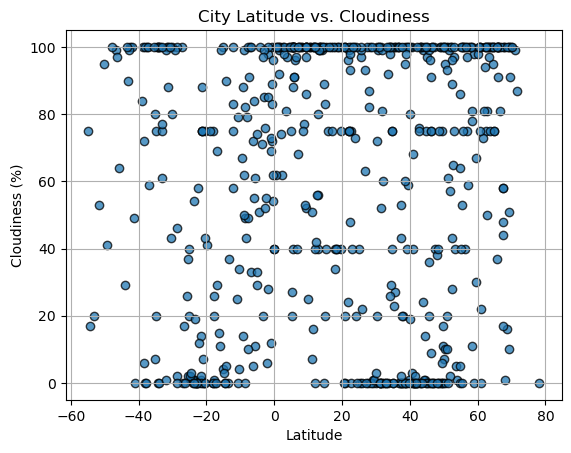

In [28]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

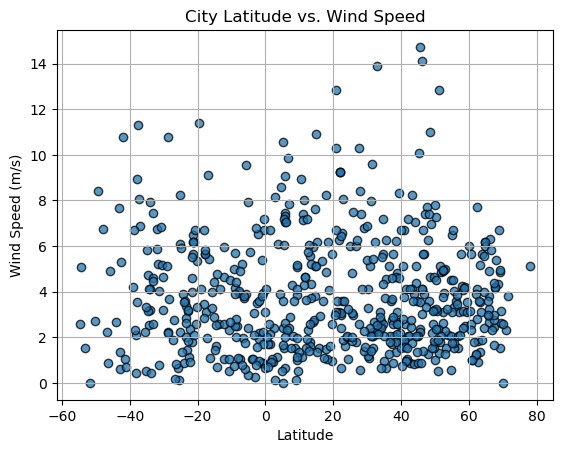

In [31]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate line equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{hemisphere} Hemisphere - {title} vs. Latitude")

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Display plot with grid
    plt.grid(True)
    plt.legend()

    # Show plot
    plt.show()


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uthal,25.8072,66.6219,29.15,81,22,2.98,PK,1718929442
1,ribeira grande,38.5167,-28.7000,19.32,84,100,1.34,PT,1718929444
4,turtas,58.9417,69.1325,13.81,92,98,2.50,RU,1718929447
6,badger,64.8000,-147.5333,24.58,34,75,6.17,US,1718929450
7,lerwick,60.1545,-1.1494,11.00,89,98,6.00,GB,1718929452


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,2.32,69,41,8.43,TF,1718929445
3,puerto natales,-51.7236,-72.4875,-11.75,92,53,0.00,CL,1718929446
5,pisco,-13.7000,-76.2167,18.03,82,0,2.57,PE,1718929449
17,castillos,-34.1667,-53.8333,10.83,79,0,3.20,UY,1718929464
20,papatowai,-46.5619,169.4708,8.47,67,99,2.24,NZ,1718929468


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.456769788738428


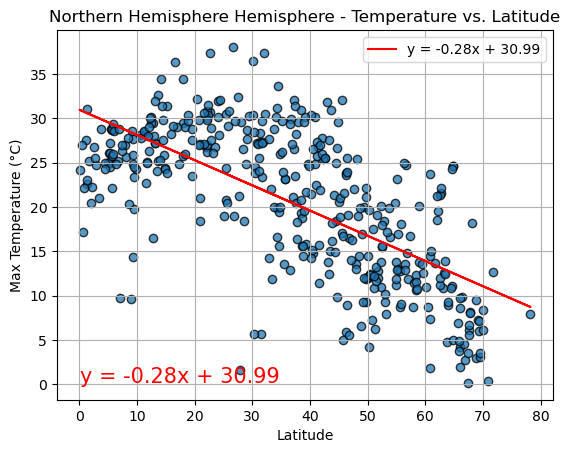

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Temperature", "Latitude", "Max Temperature (°C)", "Northern Hemisphere")

The r-squared is: 0.6419362425427475


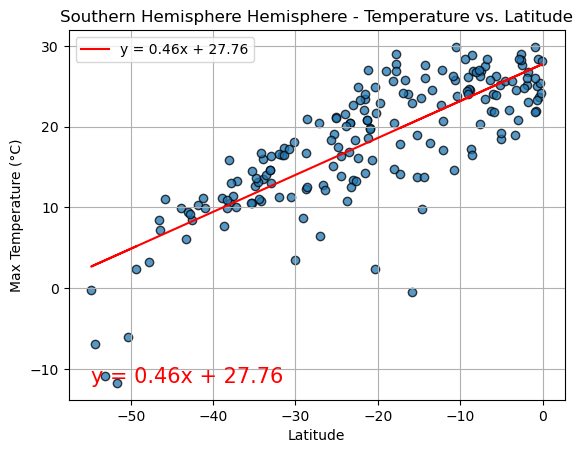

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Temperature", "Latitude", "Max Temperature (°C)", "Southern Hemisphere")

**Discussion about the linear relationship:** Both hemispheres show a positive relationship between latitude and temperature, reflecting a trend of warmer temperatures near the equator and cooler temperatures towards the poles.

The Southern Hemisphere exhibits a stronger correlation, implying that latitude may play a more dominant role in determining temperatures south of the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0018904408205632232


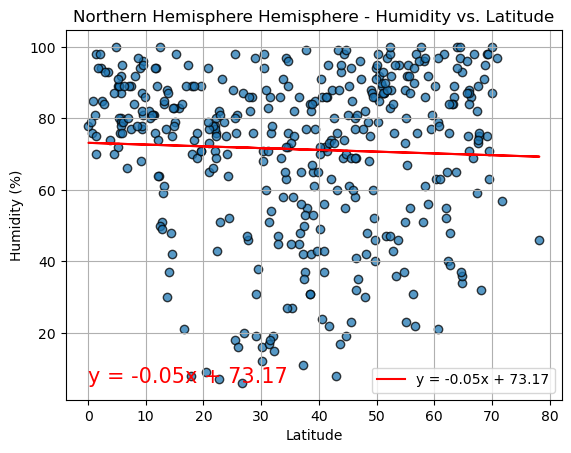

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Humidity", "Latitude", "Humidity (%)", "Northern Hemisphere")

The r-squared is: 7.813924680649345e-07


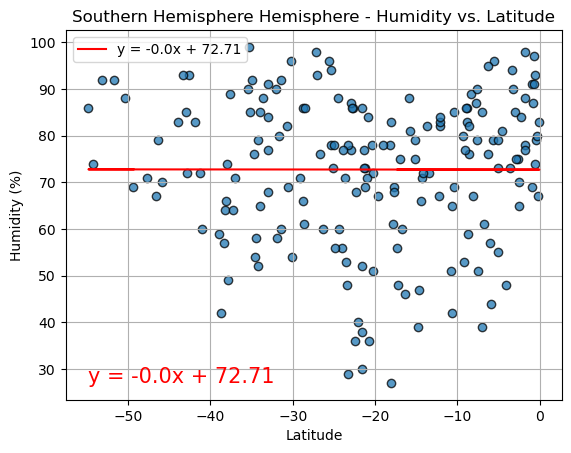

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Humidity", "Latitude", "Humidity (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** Both hemispheres exhibit very low r-squared values for the relationship between latitude and humidity, indicating that latitude does not provide a meaningful explanation for variations in humidity levels across cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01077416876223213


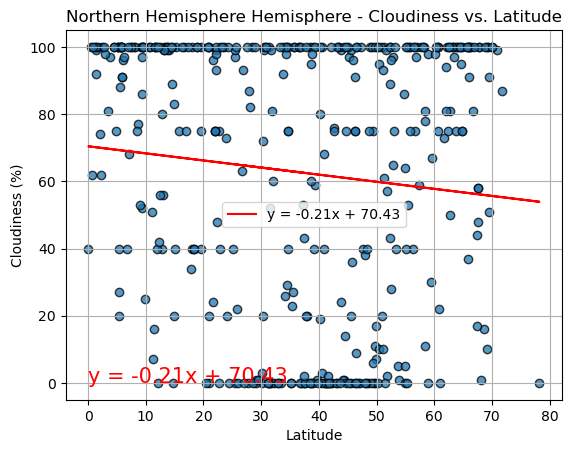

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Cloudiness", "Latitude", "Cloudiness (%)", "Northern Hemisphere")

The r-squared is: 0.0020915434984860584


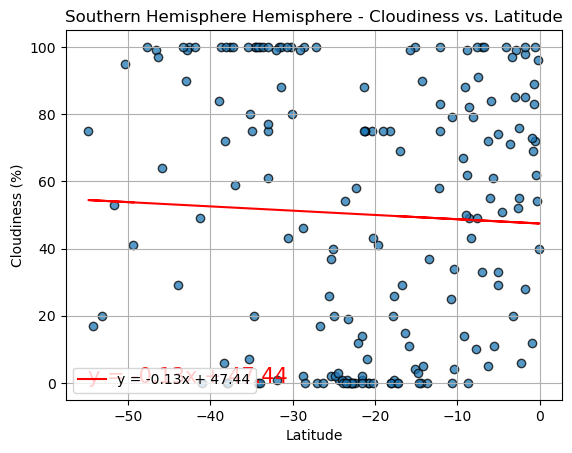

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Cloudiness", "Latitude", "Cloudiness (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** Both hemispheres exhibit extremely low r-squared values for the relationship between latitude and cloudiness, indicating that latitude is not a meaningful predictor of cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0032515399388857815


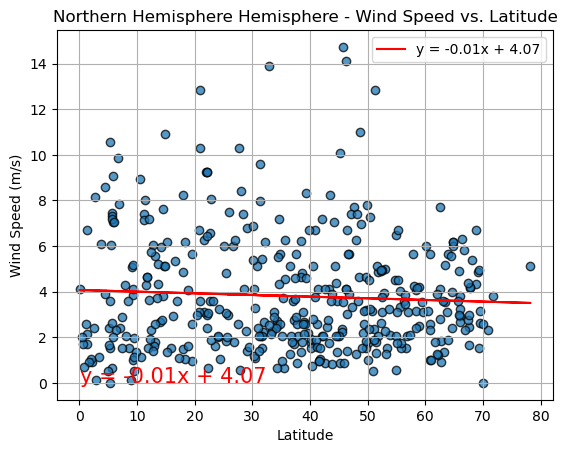

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Wind Speed", "Latitude", "Wind Speed (m/s)", "Northern Hemisphere")

The r-squared is: 0.0191348967756496


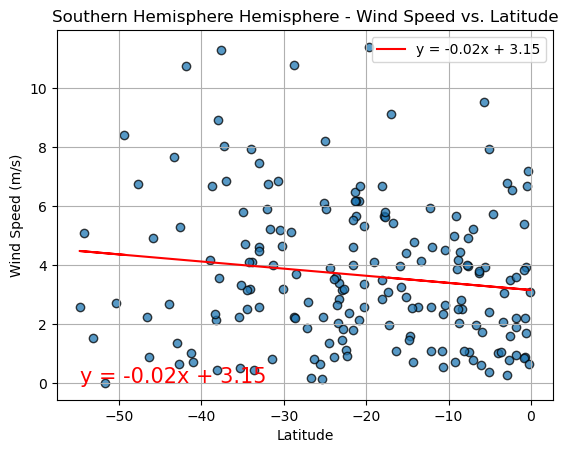

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Plot linear regression
plot_linear_regression(x_values, y_values, "Wind Speed", "Latitude", "Wind Speed (m/s)", "Southern Hemisphere")

**Discussion about the linear relationship:** Both hemispheres show low r-squared values for the relationship between latitude and wind speed, indicating that latitude is not a strong predictor of wind speed variability.